In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## RandomForest

In [ ]:
def GridSearch_CV_RFС(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier as rfc

    estimator = RandomForestClassifier()
    param_tree = { 
            "n_estimators"      : [i for i in range(1, 21)],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            "max_depth": [i for i in range(1, 15)],
            'criterion': ['entropy', 'gini'],
            'n_jobs': [-1]
            }

    model_rfc = GridSearchCV(estimator, param_tree, n_jobs=-1, cv=5)
    model_rfc.fit(X_train, y_train)

    return model_rfc.best_score_ , model_rfc.best_estimator_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    
    print ("R2 score:",r2(y_test,y_predict))
    
    return y_test,y_predict

In [ ]:
score, model = GridSearch_CV_RFС(X_train_clf, y_train_clf)

In [ ]:
print(f'Точность на тестовых данных: {round(score*100, 2)}%')

Точность на тестовых данных: 77.27%


<Figure size 720x1080 with 0 Axes>

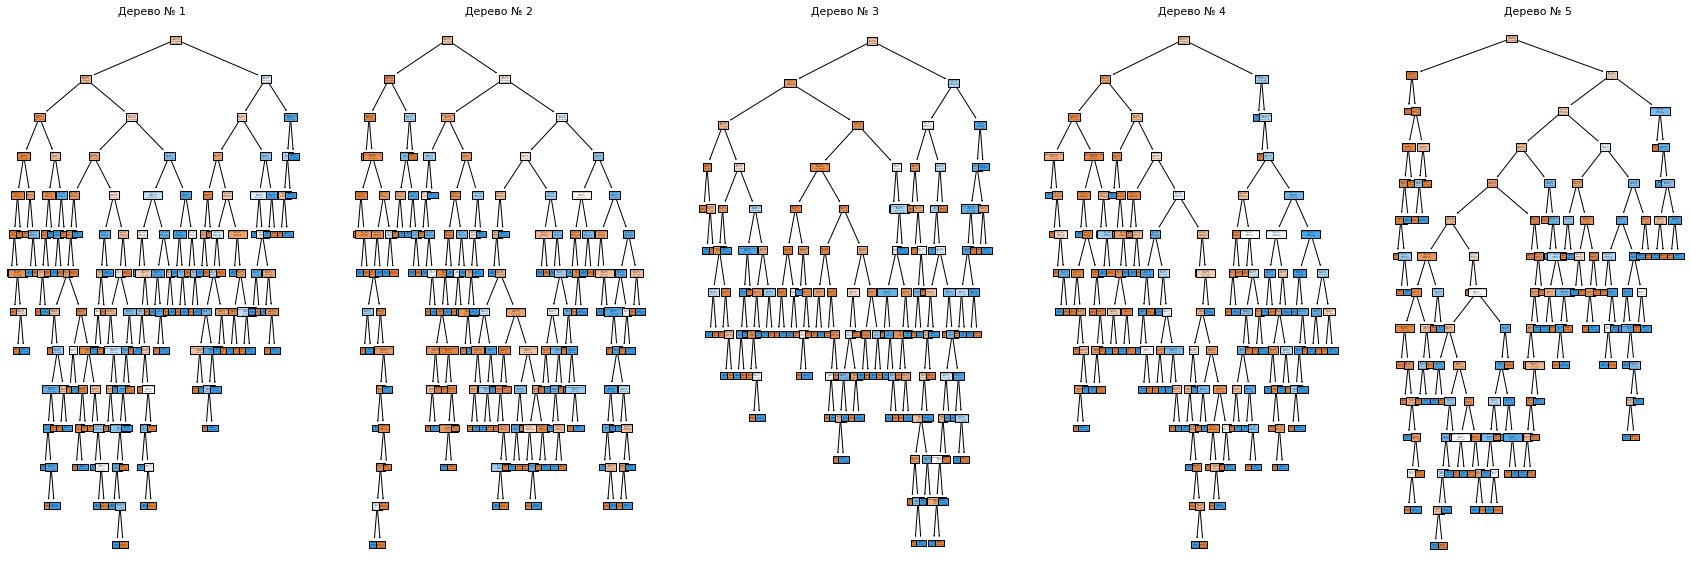

In [ ]:
plt.figure(figsize=(10,15))
fn = [i for i in X_train_clf.columns]
cn = ['Диабет', 'Не диабет']
# обозначим набор графиков для вывода нескольких деревьев
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (30,10))

for index in range(0, 5):
    # Построение графика 1 дерева, выбираем по индексу из общей модели   
    plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Дерево № ' + str(index+1), fontsize = 11)
fig.savefig('rf_5trees.svg')